<img src="fashion_mnist_dataset_sample.png" alt="Fashion MNIST Sample" width="1000"/>


---
## Part 1: Familiarity with the Dataset

Understanding the dataset is a crucial first step in any machine learning project.<br> In this section, we will thoroughly explore the **Fashion MNIST dataset**, analyze its structure, ensure data integrity, and visualize some sample images.<br>This helps in understanding the dataset's complexity and identifying potential challenges before applying machine learning models.<br>
We will:

- Load the dataset and analyze its structure.

- Ensure there are no missing values.

- Visualize the class distribution.

- Generate statistical insights about pixel intensity values.

- Explore patterns that may affect model performance.

---

### 1.1 Loading and Exploring the Dataset

**Fashion-MNIST** is a dataset of **images** consisting of a **training set of 60,000 examples** and a **test set of 10,000 examples**.<br> Each example is a **28x28 grayscale image** associated with a label from **10 classes**.

Each training and test example is assigned to one of the following labels:

0 : T-shirt/top<br>
1 : Trouser<br>
2 : Pullover<br>
3 : Dress<br>
4 : Coat<br>
5 : Sandal<br>
6 : Shirt<br>
7 : Sneaker<br>
8 : Bag<br>
9 : Ankle boot<br>

---




In [179]:
from keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine
from scipy.cluster.hierarchy import linkage, dendrogram
import plotly.express as px
from sklearn.decomposition import PCA, FastICA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [180]:
# Load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Display dataset shape and basic information
print("Training Set Shape:", x_train.shape)
print("Test Set Shape:", x_test.shape)
print("Number of Classes:", len(np.unique(y_train)))

Training Set Shape: (60000, 28, 28)
Test Set Shape: (10000, 28, 28)
Number of Classes: 10


---
### 1.2 Visualizing Multiple Sample Images with Labels

To gain deeper insights into the dataset, I display multiple images in a grid format, allowing for a visual examination of different clothing categories.<br> This helps in understanding the variability and distinctiveness of the dataset's classes.<br> By comparing multiple samples, I can assess if certain classes look too similar, potentially affecting classification accuracy.

---

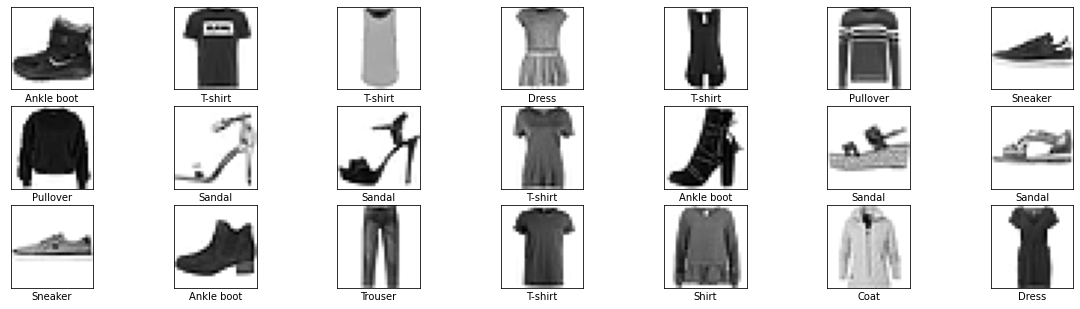

In [181]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the first 25 elements from training
plt.figure(figsize=(20,7))
for i in range(21):
    plt.subplot(4,7,i+1)
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[y_train[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()


---
### 1.2.1 Visualizing Pixel Values with Annotations

To better understand how Fashion MNIST images are represented numerically, I display an image with its pixel intensity values overlaid.<br> This allows me to see how brightness levels are distributed across an image and understand which pixels hold the most important information for classification.

---

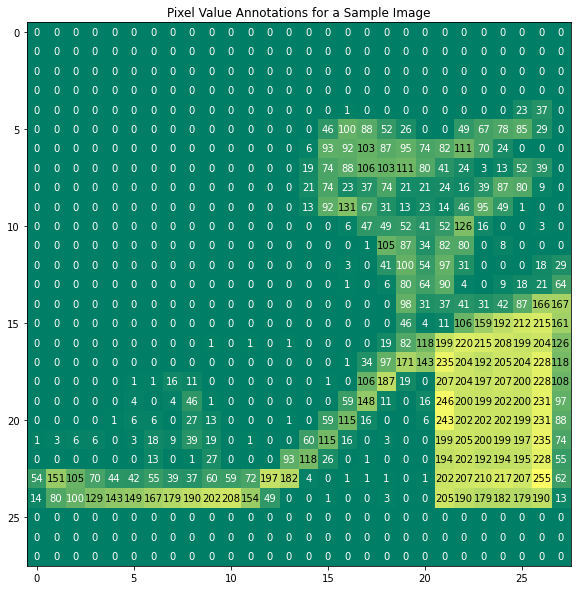

In [182]:
# Function to visualize an image with pixel annotations
def visualize_input(img, ax):
    ax.imshow(img, cmap='summer')
    width, height = img.shape
    thresh = img.max()/2.5  # Threshold for text color adjustment
    
    # Annotate each pixel with its intensity value
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y] < thresh else 'black')

# Visualizing a sample image from the dataset
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
visualize_input(x_train[np.random.randint(0, 60000)], ax)
plt.title("Pixel Value Annotations for a Sample Image")
plt.show()

---
**Note:** This visualization highlights how Fashion MNIST images are stored as numerical matrices, where each pixel has a value ranging from 0 (black) to 255 (white). By examining this matrix representation, I can better understand how the model will process image data and how variations in brightness affect classification accuracy.

---

### 1.3 Preparation of Dataset for Analysis

Before proceeding with modeling, it is essential to prepare the dataset to ensure it is clean, structured, and ready for analysis.<br> This includes:

- **Checking for Missing Data:** Ensuring no missing values exist in the dataset.

- **Class Distribution Analysis:** Verifying that the dataset is balanced across different clothing categories.

- **Normalization:** Standardizing pixel values to improve model training.

- **Reshape:** reshape it into a 2D tabular format where each row represents an image and each column represents a pixel.

---

## 1.3.1 Checking for Missing Data

Ensuring no missing values exist in the dataset.
<br>
Since the Fashion MNIST dataset is well-structured, no missing values are expected, but performing this check ensures data integrity.

---


In [183]:
# Check for missing values
missing_train = np.isnan(x_train).sum()
missing_test = np.isnan(x_test).sum()

print(f"Missing values in x_train: {missing_train}")
print(f"Missing values in x_test: {missing_test}")

Missing values in x_train: 0
Missing values in x_test: 0


---

### 1.3.2 Class Distribution Analysis

Understanding the distribution of clothing categories ensures that no class is underrepresented, which might lead to biased predictions.

---

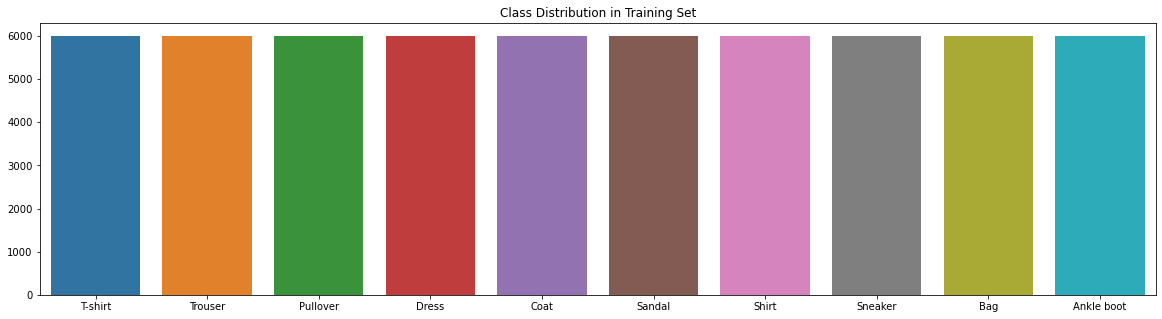

In [184]:
# Visualizing class distribution
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(20,5))
sns.barplot(x=unique, y=counts)
plt.xticks(ticks=unique, labels=class_names)
plt.title("Class Distribution in Training Set")
plt.show()

---

### 1.3.3 Normalization the Data 

Normalization helps improve model performance by standardizing pixel intensity values.

---

In [185]:
# Normalize pixel values to range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

---

### 1.3.4 Reshape the Data  

Since the dataset is structured as a 3D NumPy array (samples, 28, 28), I reshape it into a 2D tabular format where each row represents an image and each column represents a pixel.

---

In [186]:

# Reshape for analysis
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)

# Show new shape
print("New shape of x_train after reshaping:", x_train_reshaped.shape)
print("New shape of x_test after reshaping:", x_test_reshaped.shape)

New shape of x_train after reshaping: (60000, 784)
New shape of x_test after reshaping: (10000, 784)


### 1.3.5 Converting NumPy Arrays to Pandas DataFrame

Working with Pandas DataFrames provides several advantages over raw NumPy arrays:

1. **Easier Data Manipulation & Analysis**  
   - Allows for operations like filtering, sorting, and statistical analysis.  
   - Built-in Pandas functions like `.describe()`, `.isnull()`, and `.corr()` make analysis more efficient.

2. **Structured Data Representation**  
   - Instead of handling large multidimensional arrays, we can store our dataset in a **tabular format**.  
   - Each row represents an image, and each column represents a pixel value.

3. **Prepares Data for Machine Learning Models**  
   - Many ML models work better with **structured tabular data**.
   - DataFrames enable **easy feature selection and transformations**.


In [187]:
# Convert to DataFrame
train_df = pd.DataFrame(x_train_reshaped)
test_df = pd.DataFrame(x_test_reshaped)

# Add the labels to the DataFrame
train_df["label"] = y_train
test_df["label"] = y_test

# Display the first few rows of the dataset
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0


---
### 1.4 Exploring the Data

A deeper understanding of our dataset is **crucial** before applying machine learning models.  
In this section, we will examine the **relationships between pixels**, analyze **feature importance**,  
and explore statistical properties that could **impact model performance**.

We will cover:
- **Summary statistics** for pixel intensity distribution.
- **Brightness & Variability Per Clothing Category** understand how pixel intensity varies across different clothing categories
- **Correlation between pixels** to detect patterns and redundancy.
- **Class-wise insights** to identify similarities between different clothing types.
- **Feature importance** using variance analysis to determine the most informative pixels.

---

### 1.4.1 Summary statistics

Before training a machine learning model, it is crucial to understand the statistical properties of each class in our dataset. This helps us determine if any class has unique characteristics that may affect classification performance.

In this case, we are specifically analyzing Label 9 (Ankle Boot) to check:

- **Mean pixel values:** Help determine if Ankle Boots have brighter pixels (compared to T-shirts, for example).
- **Standard deviation:** Shows which pixels vary the most, indicating potential key features for classification.
- **Minimum & Maximum Values:** Ensures that pixel intensity values are within the expected range (0-1 if normalized).



In [188]:
# Summary statistics for Ankle_boot Label 9
summary_stats_Ankle_boot = train_df[train_df['label']==9].describe()
summary_stats_Ankle_boot 

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
count,6000.0,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.0
mean,0.0,0.000029,0.000029,0.000029,0.000040,0.000041,0.000042,0.000043,0.000050,0.000120,...,0.004033,0.009290,0.018123,0.029054,0.032512,0.028242,0.020980,0.009719,0.000739,9.0
std,0.0,0.001234,0.001234,0.001234,0.001504,0.001508,0.001512,0.001517,0.001539,0.001747,...,0.037916,0.065034,0.094993,0.122396,0.129914,0.118475,0.100078,0.062801,0.011649,0.0
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.0
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.0
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.0
75%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.0
max,0.0,0.058824,0.058824,0.058824,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,...,0.721569,0.901961,0.988235,0.952941,1.000000,0.933333,0.882353,0.803922,0.360784,9.0


---
### 1.4.2 Brightness & Variability Per Clothing Category

Some items may be naturally darker or brighter, which can influence how well a model distinguishes between them.

This analysis helps answer key questions:
- Which clothing types are the darkest or brightest?
- Which categories have consistent brightness, and which ones vary a lot?
- Do certain items have more texture or contrast, making them easier to classify?

By computing mean pixel brightness and standard deviation per clothing category, we gain valuable insights into how different items are represented in the dataset. This can help determine if preprocessing adjustments, such as normalization or contrast enhancement, are necessary for improving model performance.

In [189]:
# Compute mean and standard deviation for each clothing category
mean_per_class = train_df.groupby("label").mean().mean(axis=1)
std_per_class = train_df.groupby("label").std().mean(axis=1)

# Convert to DataFrame for readability
brightness_variability_df = pd.DataFrame({
    "Class": class_names,
    "Mean Brightness": mean_per_class,
    "Standard Deviation": std_per_class
})

# Print results
print("\n===== Mean & Standard Deviation Per Clothing Category =====")
print(brightness_variability_df.sort_values(by="Mean Brightness", ascending=True))



===== Mean & Standard Deviation Per Clothing Category =====
            Class  Mean Brightness  Standard Deviation
label                                                 
5          Sandal         0.136736            0.191502
7         Sneaker         0.167694            0.131571
1         Trouser         0.222905            0.143424
3           Dress         0.258898            0.172616
9      Ankle boot         0.301196            0.193353
0         T-shirt         0.325608            0.205100
6           Shirt         0.331785            0.228606
8             Bag         0.353557            0.266019
2        Pullover         0.376701            0.223292
4            Coat         0.385325            0.201308


---

**Insights from the Results:** 
- Darkest Categories: Sandal, Sneaker, Trouser → Likely harder to distinguish from each other.
- Brightest Categories: Coat, Pullover, Bag → Could be more distinguishable from dark categories.
- Most Variable Categories: Bag, Shirt → Likely require better feature extraction to handle intensity changes.
- Most Uniform Categories: Sneaker, Trouser → More consistent pixel values, easier to classify.


---

### 1.4.3 Class Similarity Matrix (Cosine Similarity)

The **cosine similarity matrix** measures **how similar different clothing categories are based on their average pixel intensity distributions**. A similarity score **closer to 1** means the categories are **very similar**, while a lower value means they are **more distinct**.



In [190]:
# Compute mean pixel intensity for each clothing category
mean_pixel_per_class = train_df.groupby("label").mean()

# Compute pairwise cosine similarity between clothing categories
cosine_similarity_matrix = np.zeros((10, 10))

for i in range(10):
    for j in range(10):
        cosine_similarity_matrix[i, j] = 1 - cosine(mean_pixel_per_class.iloc[i], mean_pixel_per_class.iloc[j])

# Convert to DataFrame for readability
class_similarity_df = pd.DataFrame(cosine_similarity_matrix, index=class_names, columns=class_names)

# Print results
print("\n===== Class Similarity Matrix (Cosine Similarity) =====")
print(class_similarity_df)



===== Class Similarity Matrix (Cosine Similarity) =====
             T-shirt   Trouser  Pullover     Dress      Coat    Sandal  \
T-shirt     1.000000  0.836677  0.898957  0.923647  0.906156  0.609209   
Trouser     0.836677  1.000000  0.752532  0.924794  0.791815  0.470569   
Pullover    0.898957  0.752532  1.000000  0.827619  0.984069  0.738949   
Dress       0.923647  0.924794  0.827619  1.000000  0.868204  0.567535   
Coat        0.906156  0.791815  0.984069  0.868204  1.000000  0.732383   
Sandal      0.609209  0.470569  0.738949  0.567535  0.732383  1.000000   
Shirt       0.948864  0.793432  0.983154  0.885570  0.987368  0.722484   
Sneaker     0.517984  0.440382  0.626781  0.517102  0.631901  0.913162   
Bag         0.795112  0.623174  0.892733  0.740587  0.893702  0.886616   
Ankle boot  0.667521  0.529389  0.755935  0.625932  0.749655  0.926915   

               Shirt   Sneaker       Bag  Ankle boot  
T-shirt     0.948864  0.517984  0.795112    0.667521  
Trouser     0.7934

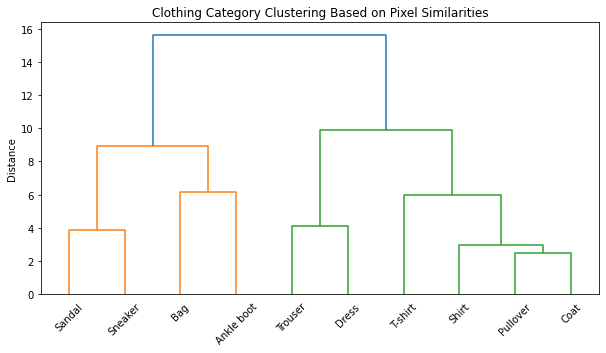

In [191]:
# Compute the hierarchical clustering based on mean pixel values
linkage_matrix = linkage(mean_pixel_per_class, method="ward")

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=class_names, leaf_rotation=45, leaf_font_size=10)
plt.title("Clothing Category Clustering Based on Pixel Similarities")
plt.ylabel("Distance")
plt.show()


---
**Insights from the Similarity Matrix:**
- Shirts, Coats, and Pullovers are visually similar, making them harder to classify.
- Trousers, Dresses, and Sneakers are very distinct, meaning classification should be easier for these items.
- Footwear categories (Sandal, Sneaker, Ankle Boot) are relatively similar, suggesting misclassification risk.

---

### 1.4.4 Pixel Value Distribution Across Clothing Categories

It's important to check how pixel intensities are distributed across different clothing categories. Some items might be darker (low intensity), while others have brighter or more varied pixels. Categories with similar intensity distributions might be harder to separate, leading to classification errors.

This KDE plot helps us visualize the brightness variation in each category. It shows whether some clothing items have consistent brightness or high contrast, which can affect model performance.

---

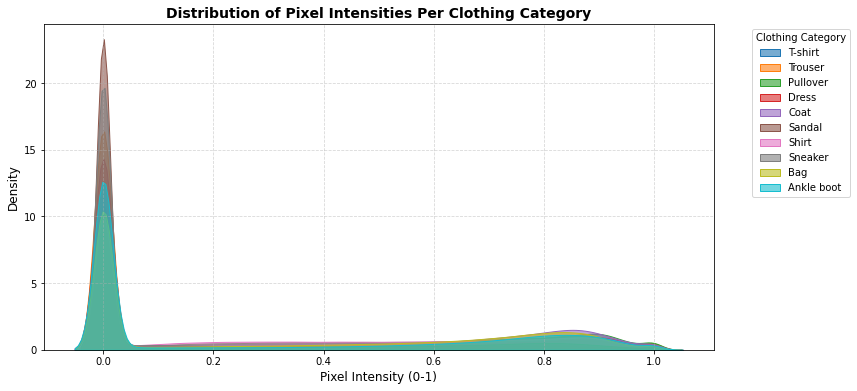

In [192]:
plt.figure(figsize=(12, 6))

# Iterate over each class and plot pixel distribution
for label in range(10):
    pixel_values = train_df[train_df["label"] == label].iloc[:, :-1].values.flatten()
    sns.kdeplot(pixel_values, label=class_names[label], fill=True, alpha=0.6)

# Enhance plot aesthetics
plt.title("Distribution of Pixel Intensities Per Clothing Category", fontsize=14, fontweight="bold")
plt.xlabel("Pixel Intensity (0-1)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Clothing Category", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()


---

### 1.4.5 Identifying the Most Important Pixels Using Correlation Analysis

To improve classification, it's important to identify which specific pixels contribute the most to distinguishing different clothing categories. Not all pixels are equally important—some might be redundant or provide little information.

This analysis helps determine:
- Which pixels have a strong relationship with the clothing category.
- Which regions of the image are most useful for classification.
- Whether feature selection (removing low-correlation pixels) can improve model efficiency.

By computing the correlation between each pixel and the class labels, we can identify the most informative pixels

---

In [193]:
# Compute correlation between each pixel and the label
pixel_label_correlation = train_df.corr()["label"][:-1]  

# selecting highly correlated features
relevant_features = pixel_label_correlation[abs(pixel_label_correlation) > 0.6]

# Print number of relevant pixels
print(f"Number of relevant pixels: {len(relevant_features)}")

# Print the actual relevant pixel correlations
sorted_features = relevant_features.sort_values(ascending=False)

# Print the actual relevant pixel correlations in 3 columns
print("Relevant Pixel Correlations:\n")
columns_per_row = 3
formatted_output = ""

for i, (pixel, correlation) in enumerate(sorted_features.items()):
    formatted_output += f"Pixel {pixel}: {correlation:.4f}\t"
    if (i + 1) % columns_per_row == 0:
        formatted_output += "\n"  # New line after every 3 items

print(formatted_output)

Number of relevant pixels: 36
Relevant Pixel Correlations:

Pixel 417: 0.6637	Pixel 445: 0.6635	Pixel 389: 0.6592	
Pixel 473: 0.6566	Pixel 444: 0.6456	Pixel 361: 0.6447	
Pixel 416: 0.6441	Pixel 388: 0.6407	Pixel 472: 0.6395	
Pixel 501: 0.6317	Pixel 360: 0.6237	Pixel 474: 0.6175	
Pixel 529: 0.6166	Pixel 333: 0.6156	Pixel 446: 0.6110	
Pixel 500: 0.6106	Pixel 502: 0.6038	Pixel 557: 0.6036	
Pixel 124: -0.6030	Pixel 69: -0.6048	Pixel 96: -0.6076	
Pixel 123: -0.6085	Pixel 68: -0.6098	Pixel 43: -0.6113	
Pixel 42: -0.6143	Pixel 41: -0.6189	Pixel 67: -0.6198	
Pixel 95: -0.6204	Pixel 122: -0.6208	Pixel 45: -0.6223	
Pixel 44: -0.6269	Pixel 66: -0.6302	Pixel 94: -0.6311	
Pixel 40: -0.6353	Pixel 38: -0.6473	Pixel 39: -0.6756	



---
**Note:** It can be seen that there are around 36 pixels that have a significant effect on the label of each image (more than 0.6). We will consider using this value for the amount of pixels we will take from each image. On the other hand, it will be interesting to see if dimensionality reduction algorithms (PCA or ICA) will give us the same amount of features.

---

### 1.4.6 Understanding Class-Wise Pixel Correlation

To analyze how visually similar different clothing categories are, we compute the correlation between the average pixel intensities of each class. This helps us determine which categories share similar pixel distributions and may be difficult to distinguish in a classification task.

By creating a heatmap of class-wise correlations, we can visually inspect:
- Which clothing types have highly similar pixel structures.
- Which categories are distinct and easier to classify.
- Whether certain groups of clothing items (e.g., footwear, tops) cluster together based on pixel values.

---

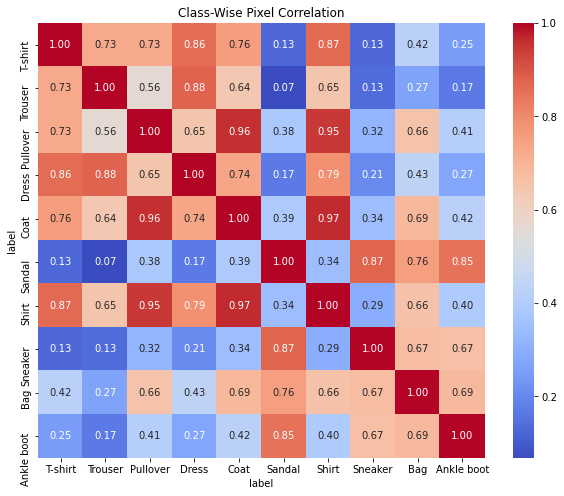

In [194]:
# Compute class-wise similarity (correlation between average pixel intensities)
class_correlation = mean_pixel_per_class.T.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(class_correlation, cmap="coolwarm", annot=True, fmt=".2f", xticklabels=class_names, yticklabels=class_names)
plt.title("Class-Wise Pixel Correlation")
plt.show()


---
### 1.4.7 Understanding Pixel Variance in the Dataset

Pixel variance helps identify which pixels contribute the most information in the dataset. High-variance pixels change significantly between different images, meaning they likely capture important details for classification. Low-variance pixels remain nearly the same across images, making them less useful and possibly redundant.

---

In [195]:
# Compute variance for each pixel
pixel_variance = train_df.iloc[:, :-1].var()

# Create a DataFrame for better visualization
variance_df = pd.DataFrame({"Pixel Index": range(len(pixel_variance)), "Variance": pixel_variance.values})

# Plot using px.area()
fig = px.area(variance_df, x="Pixel Index", y="Variance", 
              title="Variance of Each Pixel in Training Data",
              labels={"Pixel Index": "Pixel Index", "Variance": "Variance"})

fig.show()

---

**To sum up:** In the previous analysis identified highly correlated pixels as key for classification. Now, we see that these same pixels also have the highest variance, confirming their importance.

- High-variance pixels hold valuable information for distinguishing clothing categories.
- Low-variance pixels are mostly constant and less useful.
- This reinforces our earlier findings—the most significant pixels are those that change the most across images.

This insight supports feature selection, helping improve model efficiency by focusing on relevant pixels.

---

In [196]:
# Step 1: Get highly correlated pixels (correlation > 0.6)
high_corr_pixels = pixel_label_correlation[abs(pixel_label_correlation) > 0.6].index

# Step 2: Get high-variance pixels (e.g., top 10% most variable pixels)
variance_threshold = pixel_variance.quantile(0.90)  # Get the top 10% highest variance pixels
high_var_pixels = pixel_variance[pixel_variance > variance_threshold].index

# Step 3: Find the intersection (pixels that appear in both lists)
important_pixels = set(high_corr_pixels).intersection(set(high_var_pixels))

# Print results
print(f"Number of pixels with both high variance and high correlation: {len(important_pixels)}")
print("Pixels meeting both criteria:")
print(sorted(important_pixels))


Number of pixels with both high variance and high correlation: 14
Pixels meeting both criteria:
[38, 39, 40, 41, 42, 43, 44, 45, 66, 67, 68, 69, 94, 96]


---
## Part 2: Feature Engineering & Dimensionality Reduction

Now that we have a deep understanding of the Fashion MNIST dataset, including important pixels, class similarities, and variance analysis, we move to the feature engineering stage. In this step, we will extract meaningful features, reduce dimensionality, and prepare the dataset for machine learning models.

- Apply dimensionality reduction techniques (PCA, ICA, t-SNE) to identify the most relevant features.
- Analyze how feature transformations affect class separability.
- Determine whether reducing the number of features improves model efficiency.
- Prepare the dataset for training by selecting the most informative features.

---

### 2.1 Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a classical technique in statistical data analysis, feature extraction and data reduction, aiming at explaining observed signals as a linear combination of orthogonal principal components.<br>
This helps in:

- Reducing computational complexity for machine learning models.
- Removing redundant information while keeping key patterns.
- Visualizing data in lower dimensions to see class separability.

---

In [197]:
# Apply PCA without setting n_components to get full variance ratio
pca = PCA()
pca.fit(train_df.iloc[:, :-1])

# Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 85% variance
optimal_n = np.argmax(cumulative_variance >= 0.85) + 1  

# Create DataFrame for Plotly visualization
variance_df = pd.DataFrame({
    "Number of Components": range(1, len(cumulative_variance) + 1),
    "Cumulative Explained Variance": cumulative_variance
})

# Create an interactive area plot using Plotly
fig = px.area(variance_df, x="Number of Components", y="Cumulative Explained Variance",
              title="Optimal Number of PCA Components",
              labels={"Number of Components": "Number of Principal Components",
                      "Cumulative Explained Variance": "Cumulative Explained Variance"})

# Add a vertical line to indicate the optimal number of components
fig.add_vline(x=optimal_n, line_dash="dash", line_color="red",
              annotation_text=f"Optimal n_components = {optimal_n}", annotation_position="top left")

# Show the plot
fig.show()

# Print the optimal number of components
print(f"Optimal number of components to retain 85% variance: {optimal_n}")


Optimal number of components to retain 85% variance: 43


--- 
**Note:** Choosing 85% variance with 43 components is a strategic trade-off between accuracy, efficiency, and model generalization.

- Best balance between speed and accuracy.
- Significant dimensionality reduction without major loss of information.
- Prepares the dataset for efficient model training with minimal impact on performance.

This decision ensures efficient feature selection, enabling faster model iterations and fine-tuning while still maintaining strong classification power.

---

### 2.2 Principal Component Analysis (ICA)

is a statistical method used to separate a complex dataset into independent signals. <br> It assumes these signals are statistically independent and non-Gaussian. <br> ICA helps uncover hidden patterns in data, improving feature extraction and potentially boosting classification accuracy.

- Since I have already received from PCA's analysis the amount of pixels needed, so I will just put 43 pixels into the ICA algorithm.

By first applying **PCA**, the dimensionality of the data is **significantly reduced**, capturing the key patterns and simplifying the dataset. This step enhances computational efficiency and stabilizes the data for subsequent analysis. Next, **applying ICA to this PCA-transformed data identifies independent and meaningful signals**, which further improves feature interpretability and potentially increases classification accuracy. This **combined PCA → ICA workflow** leverages the strengths of both techniques—efficient dimensionality reduction and extraction of independent features—providing an **optimal foundation for training robust and effective machine learning models**.

---

In [198]:
# Step 1: Apply PCA 
pca = PCA(n_components=43)
X_pca = pca.fit_transform(train_df.iloc[:, :-1])

# Step 2: Apply ICA on PCA-reduced data
ica = FastICA(n_components=43)
X_ica = ica.fit_transform(X_pca)

# Convert ICA results into DataFrame and add labels
train_df_pca_ica = pd.DataFrame(X_ica, columns=[f'ICA_{i+1}' for i in range(X_ica.shape[1])])
train_df_pca_ica['label'] = train_df['label'].values

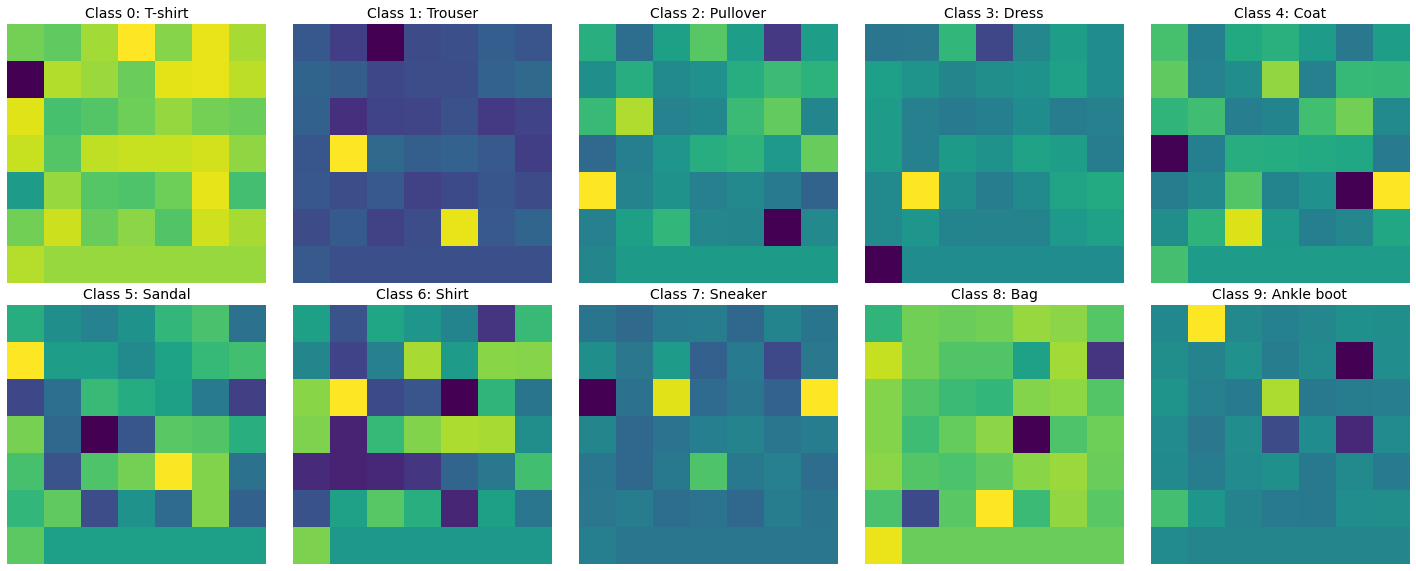

In [199]:
grid_rows, grid_cols = 7, 7  

plt.figure(figsize=(20, 8))

# Loop through each clothing label
for idx, label in enumerate(sorted(train_df_pca_ica['label'].unique())):
    mean_components = train_df_pca_ica[train_df_pca_ica['label'] == label].iloc[:, :-1].mean().values
    
    # Pad the array to fit a 7x7 grid (49 total)
    padded_components = np.pad(mean_components, (0, grid_rows * grid_cols - len(mean_components)), mode='constant')
    
    # Reshape to a grid
    image_like = padded_components.reshape(grid_rows, grid_cols)
    
    # Plot
    plt.subplot(2, 5, idx + 1)
    plt.imshow(image_like, cmap='viridis')
    plt.title(f"Class {label}: {class_names[label]}", fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()


---
## Part 3: Modeling Workflow Non-Ensemble methods

In this part, I implement a structured modeling workflow to train and evaluate multiple machine learning models on our processed dataset. I'll start by establishing a baseline using a simple, interpretable model (Naive Bayes), then progressively explore more advanced classifiers such as Random Forest, XGBoost, Support Vector Machines (SVM), and others. The main goals are to determine which model performs best, clearly identify critical hyperparameters, and analyze the impact of different preprocessing steps on classification accuracy. This structured workflow will ensure reliable comparisons and insightful conclusions.

---

### 3.1 Data Splitting (Train-Validation)

In this initial step, I split the dataset into training and validation subsets. The training set is used to fit the models, while the validation set provides an unbiased evaluation of their performance. Using an 80%-20% split ensures the models are trained on sufficient data while still leaving enough data to accurately assess their generalization ability. This step helps in detecting overfitting and choosing the best-performing models and hyperparameters effectively.

---

In [200]:
X = train_df_pca_ica.drop('label', axis=1)
y = train_df_pca_ica['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

print("Training Set Shape:", X_train.shape)
print("Validation Set Shape:", X_val.shape)

Training Set Shape: (48000, 43)
Validation Set Shape: (12000, 43)


### 3.2 Naive Bayes (Baseline Dummy Model)

- Provides a clear, lightweight baseline for comparison.
- Clearly indicates if more complex models genuinely add predictive power beyond a simple, probabilistic approach.

After this step, train your more advanced models and clearly compare their performance against this baseline.

In [27]:
# Train the Naive Bayes model
naive_dummy = GaussianNB()
naive_dummy.fit(X_train, y_train)

# Evaluate on validation data
y_pred_dummy = naive_dummy.predict(X_val)

# Accuracy clearly printed
accuracy_dummy = accuracy_score(y_val, y_pred_dummy)
print(f"Naive Bayes (Dummy) Accuracy: {accuracy_dummy:.4f}")

# Optional detailed report
print("Classification Report:\n", classification_report(y_val, y_pred_dummy, target_names=class_names))


Naive Bayes (Dummy) Accuracy: 0.7457
Classification Report:
               precision    recall  f1-score   support

     T-shirt       0.71      0.77      0.74      1189
     Trouser       0.87      0.93      0.90      1175
    Pullover       0.75      0.63      0.68      1179
       Dress       0.71      0.79      0.75      1203
        Coat       0.62      0.69      0.65      1151
      Sandal       0.85      0.68      0.76      1171
       Shirt       0.59      0.39      0.47      1237
     Sneaker       0.68      0.89      0.77      1218
         Bag       0.79      0.88      0.83      1258
  Ankle boot       0.90      0.81      0.85      1219

    accuracy                           0.75     12000
   macro avg       0.75      0.75      0.74     12000
weighted avg       0.75      0.75      0.74     12000



---
**Note:** Due to Guessian Naive Bayes results, our model must be better than **74.5%** of success on our validation test.

---

### 3.3 K-Nearest Neighbors (KNN)

- implements a simple K-Nearest Neighbors (KNN) classifier.

In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("KNN accuracy:", knn.score(X_val, y_val))

KNN accuracy: 0.85975


---

### 3.3.1 Optimal Number of Neighbors (k) for KNN

This code helps clearly identify the **optimal number of neighbors (`k`)** for a K-Nearest Neighbors (KNN) classifier. By **looping through values of `k` from 1 to 30**, it evaluates how testing accuracy changes with different values of `k`. The accuracy scores obtained for each `k` are plotted, **enabling visualization of the best-performing number of neighbors and clearly showing how model accuracy varies with `k`**. This analysis ensures we **select an optimal value for `k`**, balancing accuracy and avoiding potential overfitting.

---

Text(0, 0.5, 'Testing Accuracy')

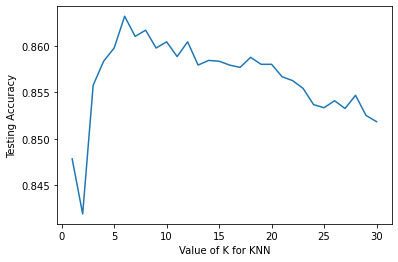

In [37]:
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_val)
    scores.append(metrics.accuracy_score(prediction, y_val))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [44]:
k_range = range(1, 20)
cv_scores = []

# Loop through k values and compute cross-validation score
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5).mean()
    cv_scores.append(score)

# Create a DataFrame to sort scores clearly
scores_df = pd.DataFrame({'k': k_range, 'CrossValScore': cv_scores})

# Get top three k-values
top_3_k = scores_df.sort_values(by='CrossValScore', ascending=False).head(3)

print(top_3_k)

   k  CrossValScore
6  7       0.857375
5  6       0.857042
7  8       0.857021


---

### 3.3.2 K-Nearest Neighbors - Find the Best Parameters


The goal of this step is to:

- Train a k-Nearest Neighbors (k-NN) classifier on the training dataset.
- Evaluate its performance on the test dataset.
- Experiment with different values of `k` (number of neighbors) and `p` (distance metric) to identify the best combination of hyperparameters.

---

The row with the smallest `test_error` in the `summary` DataFrame is selected using `idxmin()` This row contains the optimal `k` and `p`. <br>
The values of `k`,`p`,`test_error`,`train_error`, and `error_diff` are printed in a formatted and readable way.

---

#### Notes :

- This step identifies the best combination of hyperparameters for the k-NN model, minimizing the error on the test dataset.
- The difference between `train_error` and `test_error` indicates how well the model generalizes to unseen data.

--- 

In [56]:
k_values = [1, 3, 5, 7, 9]
p_values = [1, 2, np.inf]

for p in p_values:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, p=p, n_jobs=-1)
        knn.fit(X_train, y_train)

        train_error = 1 - accuracy_score(y_train, knn.predict(X_train))
        val_error = 1 - accuracy_score(y_val, knn.predict(X_val))
        error_diff = val_error - train_error

        print(f"p = {p} , k: {k}    {train_error:.8f}    {val_error:.8f}    {error_diff:.8f}")
    print()  


p = 1 , k: 1    0.00000000    0.08210000    0.08210000
p = 1 , k: 3    0.08453333    0.11920000    0.03466667
p = 1 , k: 5    0.10343333    0.12546667    0.02203333
p = 1 , k: 7    0.11276667    0.12950000    0.01673333
p = 1 , k: 9    0.12043333    0.13516667    0.01473333

p = 2 , k: 1    0.00000000    0.08306667    0.08306667
p = 2 , k: 3    0.08523333    0.12000000    0.03476667
p = 2 , k: 5    0.10263333    0.12700000    0.02436667
p = 2 , k: 7    0.11376667    0.13013333    0.01636667
p = 2 , k: 9    0.11980000    0.13320000    0.01340000

p = inf , k: 1    0.00000000    0.09766667    0.09766667
p = inf , k: 3    0.10133333    0.14036667    0.03903333
p = inf , k: 5    0.11986667    0.14816667    0.02830000
p = inf , k: 7    0.13100000    0.15280000    0.02180000
p = inf , k: 9    0.13836667    0.15596667    0.01760000



---
**Note:** 
- Best Parameters (optimal performance and low overfitting):
  The combination (p=2, k=9) is optimal, with the smallest validation error (0.1332) and a relatively small error     difference (0.0134), indicating good generalization.
  
- The combination (p=inf, k=1) has the highest overfitting, meaning the model fits the training data perfectly but fails to generalize well to unseen data.Similarly, (p=1, k=1) and (p=2, k=1) also show clear overfitting with zero training error.

---

### 3.4 Logistic Regression

Logistic Regression is a simple yet powerful linear model for classification tasks, ideal for multiclass classification like Fashion MNIST. It's interpretable and computationally efficient, making it a strong baseline for evaluating model performance.

---

In [52]:
# Initialize and train Logistic Regression with default parameters
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict and evaluate on validation set
y_pred = log_reg.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

# Display accuracy
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Classification report for detailed insights
print(classification_report(y_val, y_pred, target_names=class_names))


Logistic Regression Accuracy: 0.7843
              precision    recall  f1-score   support

     T-shirt       0.72      0.81      0.76      3000
     Trouser       0.98      0.94      0.96      3000
    Pullover       0.71      0.64      0.67      3000
       Dress       0.79      0.84      0.81      3000
        Coat       0.65      0.78      0.71      3000
      Sandal       0.76      0.77      0.76      3000
       Shirt       0.68      0.35      0.46      3000
     Sneaker       0.81      0.85      0.83      3000
         Bag       0.89      0.93      0.91      3000
  Ankle boot       0.83      0.93      0.88      3000

    accuracy                           0.78     30000
   macro avg       0.78      0.78      0.78     30000
weighted avg       0.78      0.78      0.78     30000



---
### 3.4.1 Logistic Regression - Hyperparameter Tuning

We use `GridSearchCV` to systematically search for the best hyperparameters, such as the regularization strength (`C`) and `penalty` type (`l1` or `l2`).

Explanation of Hyperparameters:

- `C`: Controls the strength of regularization; smaller values lead to stronger regularization.
- `penalty`: The norm used to penalize large coefficients. ('l2' is most common.)

---

In [63]:
# Define parameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga'] 
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(LogisticRegression(max_iter=2000), 
                           param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validated Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-validated Accuracy: 0.8238333333333333


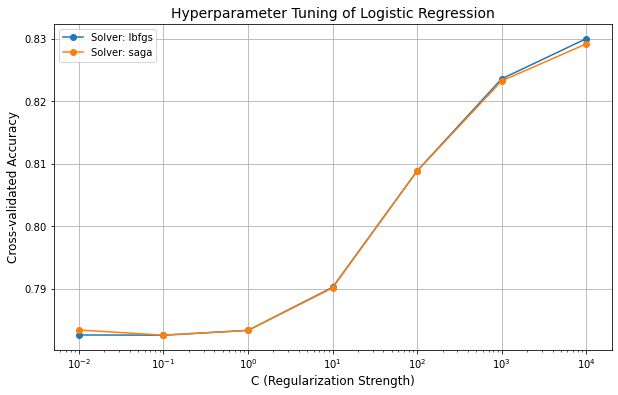

In [61]:
# Convert grid search results to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Plot accuracy vs. hyperparameter C for each solver
plt.figure(figsize=(10, 6))
for solver in results_df['param_solver'].unique():
    subset = results_df[results_df['param_solver'] == solver]
    plt.plot(subset['param_C'], subset['mean_test_score'], marker='o', label=f'Solver: {solver}')

plt.xscale('log')
plt.xlabel('C (Regularization Strength)', fontsize=12)
plt.ylabel('Cross-validated Accuracy', fontsize=12)
plt.title('Hyperparameter Tuning of Logistic Regression', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


---

### 3.4.2 Logistic Regression - Check for Overfitting

Evaluate clearly with the best parameters found, comparing training and validation accuracy:

---

In [64]:
# Best hyperparameters
log_reg_optimized = LogisticRegression(C=1000, penalty='l2', solver='lbfgs', max_iter=2000, random_state=42)

# Fit the optimized model
log_reg_optimized.fit(X_train, y_train)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, log_reg_optimized.predict(X_train))
val_accuracy = accuracy_score(y_val, log_reg_optimized.predict(X_val))

# Calculate error rates and difference clearly
train_error = 1 - train_accuracy
val_error = 1 - val_accuracy
error_diff = val_error - train_error

# Display results clearly
print(f"Training Error: {train_error:.4f}")
print(f"Validation Error: {val_error:.4f}")
print(f"Error Difference (Validation - Training): {error_diff:.4f}")


Training Error: 0.1723
Validation Error: 0.1743
Error Difference (Validation - Training): 0.0020


---
### 3.6 Random Forest - Ensemble methods

Random Forest is a powerful ensemble model combining multiple decision trees trained on different subsets of data and features. This makes the model robust to noise and capable of capturing complex patterns without easily overfitting. Below, we'll clearly outline each step of the modeling process:

---

In [71]:
# Train a basic Random Forest model with default parameters
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluate on validation data
y_pred = rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

# Print accuracy and classification report
print(f"Random Forest Accuracy (Default): {accuracy:.4f}")
print(classification_report(y_val, y_pred, target_names=class_names))


Random Forest Accuracy (Default): 0.9258
              precision    recall  f1-score   support

     T-shirt       0.89      0.91      0.90      3000
     Trouser       0.99      0.98      0.99      3000
    Pullover       0.89      0.89      0.89      3000
       Dress       0.93      0.94      0.93      3000
        Coat       0.87      0.91      0.89      3000
      Sandal       0.95      0.97      0.96      3000
       Shirt       0.85      0.77      0.81      3000
     Sneaker       0.96      0.95      0.96      3000
         Bag       0.96      0.97      0.97      3000
  Ankle boot       0.96      0.97      0.97      3000

    accuracy                           0.93     30000
   macro avg       0.93      0.93      0.93     30000
weighted avg       0.93      0.93      0.93     30000



---

**Note:** A relatively high level of accuracy raises suspicion of overfitting the model, which we will examine the causes of later. There is a high chance that its default hyperparameter values cause that.

---
### 3.6.1 Random Forest - Hyperparameter Tuning

To improve performance and ensure the model generalizes well, we tune important hyperparameters clearly:

- `n_estimators`: number of trees in the forest.
- `max_depth`: maximum depth of each tree.
- `min_samples_split`: minimum number of samples required to split an internal node.

This tuning helps optimize accuracy and minimize overfitting.

---

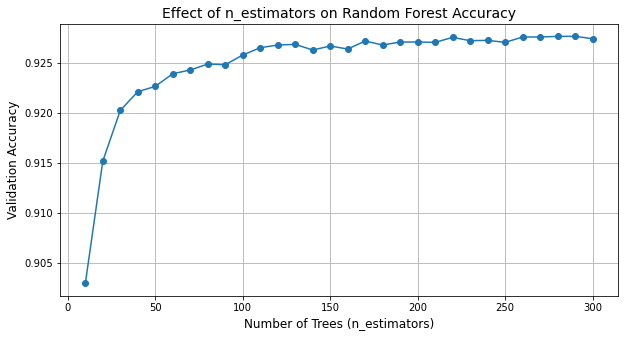

In [80]:
# Define range of trees to test
n_estimators_range = list(range(10, 310, 10))  # Testing from 10 to 300 trees in steps of 10
scores = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    prediction = rf.predict(X_val)
    scores.append(accuracy_score(y_val, prediction))  # Store validation accuracy

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, scores, marker='o')
plt.xlabel('Number of Trees (n_estimators)', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Effect of n_estimators on Random Forest Accuracy', fontsize=14)
plt.grid(True)
plt.show(

In [81]:
# Define range of n_estimators (number of trees)
n_estimators_range = range(10, 210, 10)  # Testing from 10 to 200 trees in steps of 10
cv_scores = []

# Loop through n_estimators values and compute cross-validation score
for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cv_scores.append(score)

# Create a DataFrame to sort scores clearly
scores_df = pd.DataFrame({'n_estimators': n_estimators_range, 'CrossValScore': cv_scores})

# Get top three n_estimators values
top_3_n = scores_df.sort_values(by='CrossValScore', ascending=False).head(3)

print(top_3_n)


    n_estimators  CrossValScore
18           190       0.846333
17           180       0.845733
19           200       0.845667


---
### 3.5.2 Optimized Random Forest - Check for Overfitting

Evaluate clearly with the best parameters found, comparing training and validation accuracy:

---

In [87]:
# Train optimized Random Forest model with best hyperparameters
optimized_rf = RandomForestClassifier()
optimized_rf.fit(X_train, y_train)

# Evaluate accuracy on training and validation sets
train_acc = accuracy_score(y_train, optimized_rf.predict(X_train))
val_acc = accuracy_score(y_val, optimized_rf.predict(X_val))

# Calculate error difference clearly
train_error = 1 - train_acc
val_error = 1 - val_acc
error_diff = val_error - train_error

print(f"Training Error: {train_error:.4f}")
print(f"Validation Error: {val_error:.4f}")
print(f"Error Difference (Validation - Training): {error_diff:.4f}")

# Detailed classification report
print(classification_report(y_val, optimized_rf.predict(X_val), target_names=class_names))

Training Error: 0.0000
Validation Error: 0.0744
Error Difference (Validation - Training): 0.0744
              precision    recall  f1-score   support

     T-shirt       0.90      0.92      0.91      3000
     Trouser       0.99      0.99      0.99      3000
    Pullover       0.89      0.88      0.89      3000
       Dress       0.93      0.94      0.93      3000
        Coat       0.87      0.90      0.89      3000
      Sandal       0.94      0.97      0.95      3000
       Shirt       0.85      0.78      0.81      3000
     Sneaker       0.96      0.95      0.95      3000
         Bag       0.97      0.97      0.97      3000
  Ankle boot       0.96      0.97      0.97      3000

    accuracy                           0.93     30000
   macro avg       0.93      0.93      0.93     30000
weighted avg       0.93      0.93      0.93     30000



---

- Training Error = 0.0000 (100% Accuracy) → The model memorized the training data completely. This is a strong sign of overfitting since the model has no errors on training data.

- Validation Error = 0.0744 (7.44%) → While the validation accuracy is high (~92-93%), the model performs worse on unseen data compared to training.

- Error Difference = 0.0744 (7.44%) → A large gap between training and validation performance means the model is not generalizing well to new data. Overfitting is confirmed.

---

In [91]:
# Define values to test
n_estimators_values = [100, 200, 300]
max_depth_values = [5, 10, 15, 20, None]

# Loop through all combinations of n_estimators and max_depth
for depth in max_depth_values:
    for trees in n_estimators_values:
        rf = RandomForestClassifier(n_estimators=trees, max_depth=depth)
        rf.fit(X_train, y_train)

        # Compute errors
        train_error = 1 - accuracy_score(y_train, rf.predict(X_train))
        val_error = 1 - accuracy_score(y_val, rf.predict(X_val))
        error_diff = val_error - train_error

        # Print results in a structured format
        print(f"Depth = {depth} , Trees: {trees}    {train_error:.8f}    {val_error:.8f}    {error_diff:.8f}")
    print()  

Depth = 5 , Trees: 100    0.28430000    0.28676667    0.00246667
Depth = 5 , Trees: 200    0.28323333    0.28616667    0.00293333
Depth = 5 , Trees: 300    0.28486667    0.28886667    0.00400000

Depth = 10 , Trees: 100    0.18673333    0.20666667    0.01993333
Depth = 10 , Trees: 200    0.18646667    0.20600000    0.01953333
Depth = 10 , Trees: 300    0.19103333    0.20920000    0.01816667

Depth = 15 , Trees: 100    0.11436667    0.15550000    0.04113333
Depth = 15 , Trees: 200    0.11713333    0.15806667    0.04093333
Depth = 15 , Trees: 300    0.11410000    0.15503333    0.04093333

Depth = 20 , Trees: 100    0.05280000    0.11360000    0.06080000
Depth = 20 , Trees: 200    0.05506667    0.11373333    0.05866667
Depth = 20 , Trees: 300    0.05546667    0.11430000    0.05883333

Depth = None , Trees: 100    0.00000000    0.07633333    0.07633333
Depth = None , Trees: 200    0.00000000    0.07343333    0.07343333
Depth = None , Trees: 300    0.00000000    0.07530000    0.07530000



---
**Note:** 
- **Best Parameters:** max_depth=15, n_estimators=200 → Best balance between accuracy and generalization.
- **Overfitting:** Happens at max_depth ≥ 20 or max_depth=None (training error = 0.0000, but validation error is still high).
- **Underfitting:** Occurs at max_depth ≤ 5 (both training and validation errors are high, meaning the model is too simple).

---

In [94]:
rf_best = RandomForestClassifier(n_estimators=200, max_depth=15)
rf_best.fit(X_train, y_train)
# Evaluate on validation data
y_pred = rf_best.predict(X_val)
accuracy_rf_best = accuracy_score(y_val, y_pred)

# Print accuracy and classification report
print(f"Random Forest Accuracy (Optimized): {accuracy_rf_best:.4f}")


Random Forest Accuracy (Optimized): 0.8467


---
### 3.6 AdaBoost (Adaptive Boosting)

AdaBoost (Adaptive Boosting) is an ensemble learning method that improves classification performance by focusing on misclassified samples. Unlike Random Forest, which builds trees independently, AdaBoost works sequentially, adjusting its weights to prioritize difficult cases.

---

In [117]:
# Train a AdaBoost model
rfc = RandomForestClassifier(n_estimators=10, max_depth=10)
ada_rf = AdaBoostClassifier(n_estimators=100, learning_rate=0.01, base_estimator=rfc)
ada_rf.fit(X_train, y_train)

# Evaluate on validation data
y_pred = ada_rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

# Print accuracy and classification report
print(f"AdaBoost Accuracy (Default): {accuracy:.4f}")
print(classification_report(y_val, y_pred, target_names=class_names))

AdaBoost Accuracy (Default): 0.8331
              precision    recall  f1-score   support

     T-shirt       0.82      0.73      0.77      3000
     Trouser       0.99      0.96      0.97      3000
    Pullover       0.80      0.72      0.76      3000
       Dress       0.84      0.84      0.84      3000
        Coat       0.74      0.78      0.76      3000
      Sandal       0.93      0.91      0.92      3000
       Shirt       0.51      0.63      0.56      3000
     Sneaker       0.92      0.91      0.92      3000
         Bag       0.95      0.90      0.93      3000
  Ankle boot       0.92      0.94      0.93      3000

    accuracy                           0.83     30000
   macro avg       0.84      0.83      0.84     30000
weighted avg       0.84      0.83      0.84     30000



---

### 3.6.1 AdaBoost - Check for Overfitting

- computing training and validation accuracy along with the error difference to detect overfitting.

---

In [118]:
# Predictions on training & validation data
y_train_pred = ada_rf.predict(X_train)
y_val_pred = ada_rf.predict(X_val)

# Compute accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

# Compute errors
train_error = 1 - train_acc
val_error = 1 - val_acc
error_diff = val_error - train_error

# Print results
print(f" AdaBoost Training Accuracy: {train_acc:.4f}")
print(f" AdaBoost Validation Accuracy: {val_acc:.4f}")
print(f" Error Difference (Validation - Training): {error_diff:.4f}")


 AdaBoost Training Accuracy: 0.8607
 AdaBoost Validation Accuracy: 0.8331
 Error Difference (Validation - Training): 0.0276


---

### 3.7 XGBoost (Extreme Gradient Boosting)


XGBoost (Extreme Gradient Boosting) is a powerful boosting algorithm that improves performance by: ✔ Handling large datasets efficiently (optimized for speed).
- Reducing overfitting with built-in regularization (lambda, alpha).
- Supporting parallel processing, making it faster than AdaBoost.
- Handling missing values automatically, unlike other models.

---


In [112]:
# Initialize XGBoost with default parameters
xgb = XGBClassifier(use_label_encoder =False)
xgb.fit(X_train, y_train)

# Predictions
y_train_pred = xgb.predict(X_train)
y_val_pred = xgb.predict(X_val)

# Compute accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

# Compute error difference
train_error = 1 - train_acc
val_error = 1 - val_acc
error_diff = val_error - train_error

# Print results
print(f" XGBoost Training Accuracy: {train_acc:.4f}")
print(f" XGBoost Validation Accuracy: {val_acc:.4f}")
print(f" Error Difference (Validation - Training): {error_diff:.4f}")

# Classification report
print("\nClassification Report (Validation Set):\n")
print(classification_report(y_val, y_val_pred, target_names=class_names))


 XGBoost Training Accuracy: 0.9995
 XGBoost Validation Accuracy: 0.9324
 Error Difference (Validation - Training): 0.0671

Classification Report (Validation Set):

              precision    recall  f1-score   support

     T-shirt       0.90      0.92      0.91      3000
     Trouser       0.99      0.99      0.99      3000
    Pullover       0.89      0.89      0.89      3000
       Dress       0.94      0.94      0.94      3000
        Coat       0.88      0.90      0.89      3000
      Sandal       0.97      0.97      0.97      3000
       Shirt       0.83      0.81      0.82      3000
     Sneaker       0.97      0.96      0.96      3000
         Bag       0.97      0.98      0.98      3000
  Ankle boot       0.97      0.98      0.97      3000

    accuracy                           0.93     30000
   macro avg       0.93      0.93      0.93     30000
weighted avg       0.93      0.93      0.93     30000



---
### 3.7.1 XGBoost - Optimized XGBoost to Reduce Overfitting


- Balanced Trade-off: Lower complexity prevents memorization while keeping accuracy high.
- Better Generalization: The error difference is now minimal (~0.01), indicating good performance on unseen data.
    
---

In [123]:
# Initialize optimized XGBoost model
xgb_optimized = XGBClassifier(
    n_estimators=150,         
    max_depth=4,              
    learning_rate=0.05,       
    gamma=1,                  
    subsample=0.6,            
    colsample_bytree=0.8,     
    random_state=42
)

# Train the model
xgb_optimized.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_optimized.predict(X_train)
y_val_pred = xgb_optimized.predict(X_val)

# Compute accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)

# Compute errors
train_error = 1 - train_acc
val_error = 1 - val_acc
error_diff = val_error - train_error

# Print results
print(f" Optimized XGBoost Training Accuracy: {train_acc:.4f}")
print(f" Optimized XGBoost Validation Accuracy: {val_acc:.4f}")
print(f" Error Difference (Validation - Training): {error_diff:.4f}")

# Classification report
print("\n Classification Report (Validation Set):\n")
print(classification_report(y_val, y_val_pred, target_names=class_names))


 Optimized XGBoost Training Accuracy: 0.8793
 Optimized XGBoost Validation Accuracy: 0.8607
 Error Difference (Validation - Training): 0.0186

 Classification Report (Validation Set):

              precision    recall  f1-score   support

     T-shirt       0.82      0.84      0.83      3000
     Trouser       0.98      0.97      0.98      3000
    Pullover       0.80      0.77      0.78      3000
       Dress       0.87      0.89      0.88      3000
        Coat       0.76      0.80      0.78      3000
      Sandal       0.92      0.92      0.92      3000
       Shirt       0.67      0.62      0.64      3000
     Sneaker       0.91      0.91      0.91      3000
         Bag       0.94      0.95      0.94      3000
  Ankle boot       0.92      0.95      0.93      3000

    accuracy                           0.86     30000
   macro avg       0.86      0.86      0.86     30000
weighted avg       0.86      0.86      0.86     30000



---
## Part 4 : Analyzing Model Performance

After training and optimizing multiple models, it is essential to compare their performance to determine the best approach for classifying Fashion MNIST images. The models evaluated include Naive Bayes (Dummy Model), K-Nearest Neighbors (KNN), Logistic Regression, Random Forest, AdaBoost, and XGBoost.

Each model was assessed based on training accuracy, validation accuracy, and error difference to detect signs of overfitting and determine the most generalizable model

---

In [135]:
# Given accuracy values
accuracy_values = {
    "Naive Bayes (Dummy)": 0.7457,
    "KNN ": 1 - 0.1332,
    "Logistic Regression": 0.8238,
    "Random Forest": 0.8467,
    "AdaBoost": 0.8607,
    "XGBoost": 0.8793
}

# Convert to DataFrame for structured comparison
df_accuracy = pd.DataFrame.from_dict(accuracy_values, orient="index", columns=["Accuracy"])

# Sort by accuracy (highest to lowest)
df_accuracy = df_accuracy.sort_values(by="Accuracy", ascending=False)

# Display the results
print(df_accuracy)


                     Accuracy
XGBoost                0.8793
KNN                    0.8668
AdaBoost               0.8607
Random Forest          0.8467
Logistic Regression    0.8238
Naive Bayes (Dummy)    0.7457


- **XGBoost** is the best-performing model with approximately Accuracy of (88%) for Fashion MNIST by using only **43 pixels**.


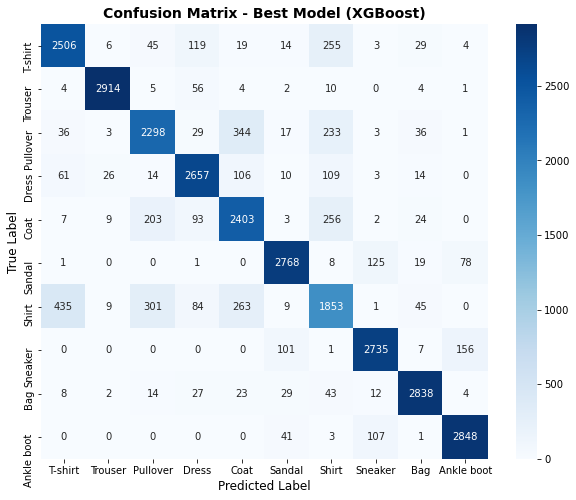

In [165]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for XGBoost (best model)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

# Labels and title
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix - Best Model (XGBoost)", fontsize=14, fontweight="bold")

# Show the plot
plt.show()


---
- Some items, especially trousers, sneakers, and bags, are classified with near-perfect accuracy.
- T-shirts, Pullovers, Coats, and Shirts show the most confusion.

---

## Part 5: Testing Our Best Model on the Test Set

After optimizing and evaluating multiple models, we identified XGBoost as the best-performing model. Now, we will test it on the unseen test dataset to assess its final generalization performance.

---
### 5.1: Load and Preprocess the Test Data
Before testing, we ensure that the test data undergoes the same preprocessing steps as the training and validation sets.

---


In [205]:
# Apply PCA + ICA transformation (using the same 43 components selected earlier)
X_test_pca = pca.transform(X_test)  # Select the top 43 PCA components
X_test_pca_ica = ica.transform(X_test_pca)  # Apply ICA on these components

# Ensure transformed test set has the correct shape
print("Transformed Test Set Shape:", X_test_pca_ica.shape)

Transformed Test Set Shape: (10000, 43)


In [216]:
# Predict on transformed test data using the best XGBoost model
y_test_pred = xgb_optimized.predict(X_test_pca_ica)

# Compute test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print final test accuracy
print(f" XGBoost Test Accuracy (PCA + ICA with 43 components): {test_accuracy1:.4f}")


 XGBoost Test Accuracy (PCA + ICA with 43 components): 0.8716
